# EDA  
Ref1: https://www.kaggle.com/cdeotte/one-feature-model-0-930  
Ref2: https://www.kaggle.com/pestipeti/eda-ion-switching  
Ref3: https://www.kaggle.com/tarunpaparaju/ion-switching-competition-signal-eda  

## Load dataset  

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 3 columns):
time             float64
signal           float64
open_channels    int64
dtypes: float64(2), int64(1)
memory usage: 114.4 MB


# Training_data

## Open_channel

In [6]:
train["open_channels"].value_counts()

0     1240152
1      985865
3      668609
2      553924
4      403410
5      277877
7      265015
8      245183
6      188112
9      136120
10      35733
Name: open_channels, dtype: int64

Training dataset was construct 50.0000s interval 10 batches dataset.  
So, let's look each batch's open channel distribution.  

In [10]:
#1st batch
train.iloc[0:500000]['open_channels'].value_counts()

0    484134
1     15866
Name: open_channels, dtype: int64

In [11]:
#2nd batch
train.iloc[500001:1000000]['open_channels'].value_counts()

0    480661
1     19338
Name: open_channels, dtype: int64

In [12]:
#3rd batch
train.iloc[1000001:1500000]['open_channels'].value_counts()

1    373995
0    126004
Name: open_channels, dtype: int64

In [13]:
#4th batch
train.iloc[1500001:2000000]['open_channels'].value_counts()

2    216883
3    184408
1     86930
0     11778
Name: open_channels, dtype: int64

In [14]:
#5th batch
train.iloc[2000001:2500000]['open_channels'].value_counts()

7     132319
8     123243
6      92779
9      69650
5      45145
10     18227
4      14625
3       3426
2        526
1         57
0          2
Name: open_channels, dtype: int64

In [15]:
#6th batch
train.iloc[2500001:3000000]['open_channels'].value_counts()

4    187582
3    147333
5     93162
2     59234
1     11732
0       956
Name: open_channels, dtype: int64

In [16]:
#7th batch
train.iloc[3000001:3500000]['open_channels'].value_counts()

1    376804
0    123195
Name: open_channels, dtype: int64

In [17]:
#8th batch
train.iloc[3500001:4000000]['open_channels'].value_counts()

2    216659
3    181693
1     89193
0     12454
Name: open_channels, dtype: int64

In [18]:
#9th batch
train.iloc[4000001:4500000]['open_channels'].value_counts()

4    185846
3    148234
5     93012
2     60061
1     11879
0       967
Name: open_channels, dtype: int64

In [19]:
#10th batch
train.iloc[4500001:5000000]['open_channels'].value_counts()

7     132696
8     121940
6      95333
9      66470
5      46556
10     17504
4      15357
3       3513
2        561
1         69
Name: open_channels, dtype: int64

Woo, it looks interesting distribution.  
Especially, 4th, 5th, 6th, 8th, 9th, 10th distribution are wide.  
Next, let's visualize them.

In [34]:
#At this time I want to make 3D histgram, load following librarys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=5, cols=2, subplot_titles=["Batch #{}".format(i) for i in range(10)])
i = 0

for row in range(1, 6):
    for col in range(1, 3):   
        
        data = train.iloc[(i * 500000):((i+1) * 500000 + 1)]['open_channels'].value_counts(sort=False).values
        fig.add_trace(go.Bar(x=list(range(11)), y=data), row=row, col=col)
        
        i += 1

fig.update_layout(title_text="Target distribution in different batches", height=1200, showlegend=False)
fig.show()

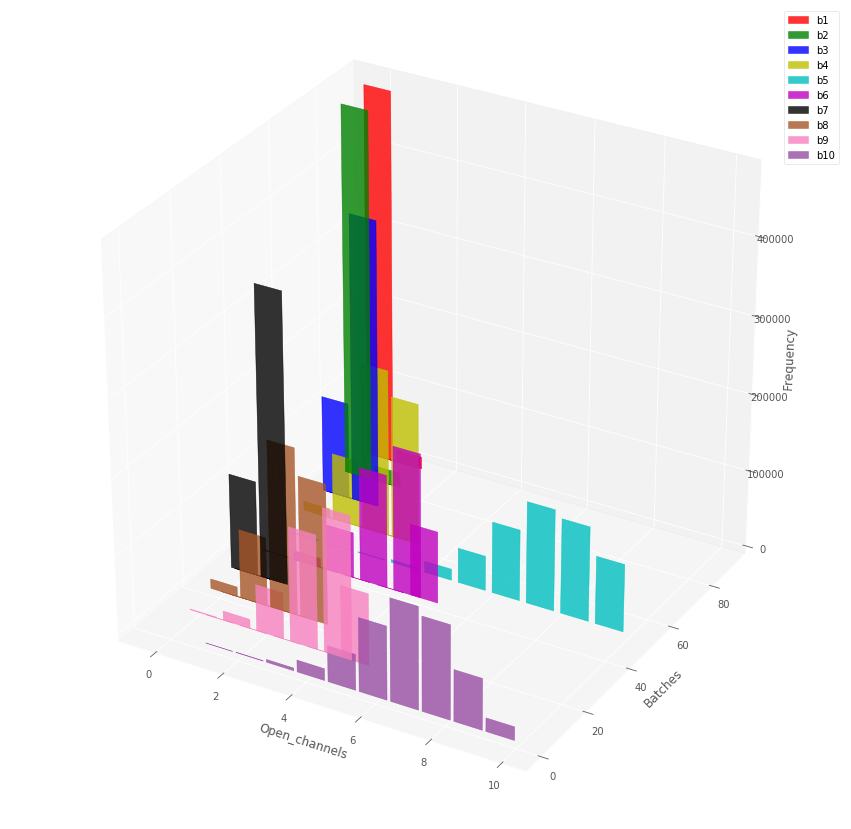

In [44]:
#merge every histgram and show 3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
nbins = 10
b1=train.iloc[0:500000]['open_channels']#.value_counts()
b2=train.iloc[500001:1000000]['open_channels']#.value_counts()
b3=train.iloc[1000001:1500000]['open_channels']#.value_counts()
b4=train.iloc[1500001:2000000]['open_channels']#.value_counts()
b5=train.iloc[2000001:2500000]['open_channels']#.value_counts()
b6=train.iloc[2500001:3000000]['open_channels']#.value_counts()
b7=train.iloc[3000001:3500000]['open_channels']#.value_counts()
b8=train.iloc[3500001:4000000]['open_channels']#.value_counts()
b9=train.iloc[4000001:4500000]['open_channels']#.value_counts()
b10=train.iloc[4500001:5000000]['open_channels']#.value_counts()

for c, z,bn,label in zip(['r', 'g', 'b', 'y','c','m','k','#a65628','#f781bf','#984ea3'], [90,80,70,60,50,40,30, 20, 10, 0],[b1,b2,b3,b4,b5,b6,b7,b8,b9,b10],["b1","b2","b3","b4","b5","b6","b7","b8","b9","b10"]):
    ys = bn

    hist, bins = np.histogram(ys, bins=nbins)
    xs = (bins[:-1] + bins[1:])/2

    ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.8, label=label)
ax.set_xlabel('Open_channels')
ax.set_ylabel('Batches')
ax.set_zlabel('Frequency')

plt.legend()
plt.show()

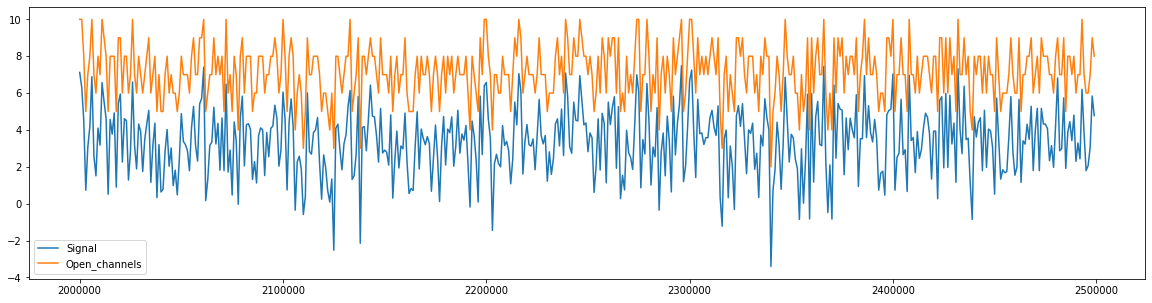

In [7]:
import matplotlib.pyplot as plt
a = 2000000
b=2500000; res=1000
plt.figure(figsize=(20,5))
plt.plot(range(a,b,res),train.signal[a:b][0::res],label="Signal")
plt.plot(range(a,b,res),train.open_channels[a:b][0::res],label="Open_channels")
plt.legend()
plt.show()

The wide distribution batche's open_channels histgram shape are look like Normal distribution.  

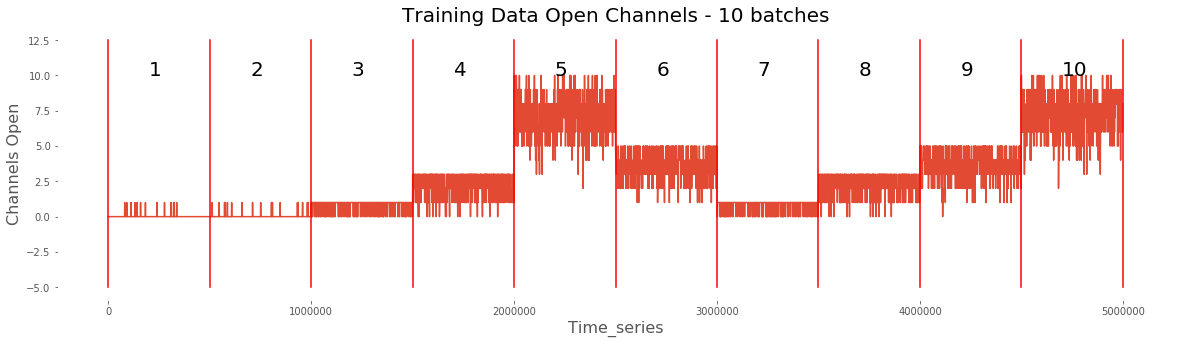

In [48]:
plt.figure(figsize=(20,5)); res = 1000
plt.plot(range(0,train.shape[0],res),train.open_channels[0::res])
for i in range(11): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for j in range(10): plt.text(j*500000+200000,10,str(j+1),size=20)
plt.xlabel('Time_series',size=16); plt.ylabel('Channels Open',size=16); 
plt.title('Training Data Open Channels - 10 batches',size=20)
plt.show()

## Signal

In [45]:
train['signal'].min(), train['signal'].max(), train['signal'].mean()

(-5.7965, 13.244, 1.38624631384)

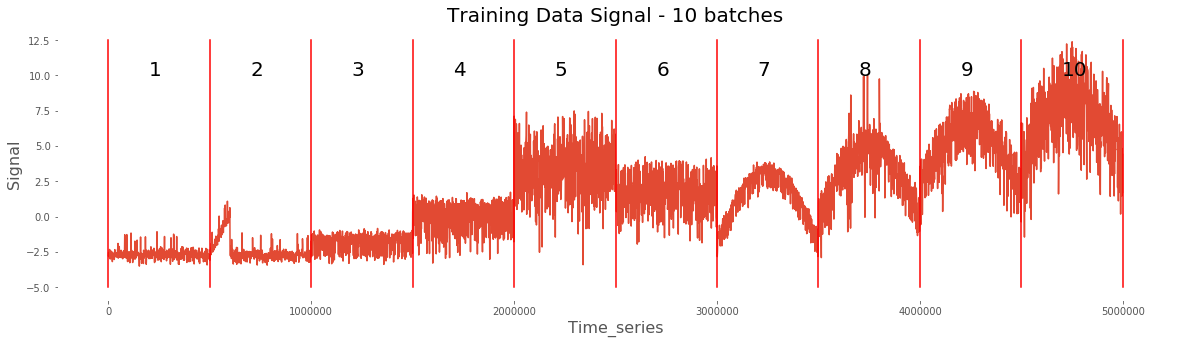

In [47]:
#check whole of singnal data
plt.figure(figsize=(20,5)); res = 1000
plt.plot(range(0,train.shape[0],res),train.signal[0::res])
for i in range(11): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for j in range(10): plt.text(j*500000+200000,10,str(j+1),size=20)
plt.xlabel('Time_series',size=16); plt.ylabel('Signal',size=16); 
plt.title('Training Data Signal - 10 batches',size=20)
plt.show()

According to the paper, the data is synthesized. Also "electrophysiological" noise and drift were added.  
Drift is a signal bias causing the signal to no longer be a horizontal line like batches 2, 7, 8, 9, 10 above.  

## Check Signal and Open Channels from a micro perspective 

#########################
### Random 3601429 to 3606429
#########################


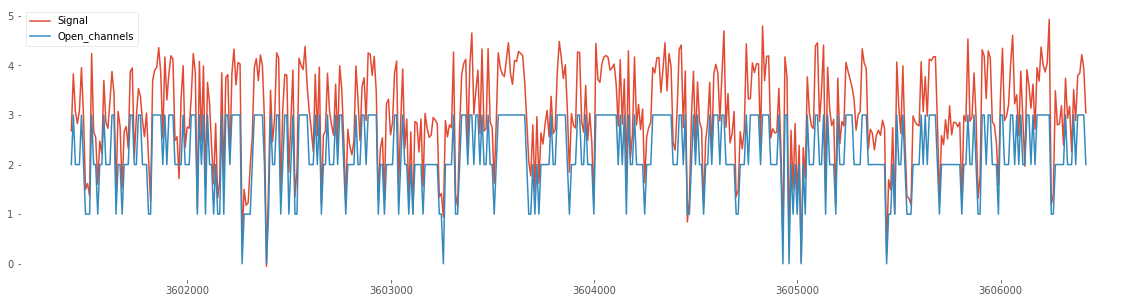

#########################
### Random 1642203 to 1647203
#########################


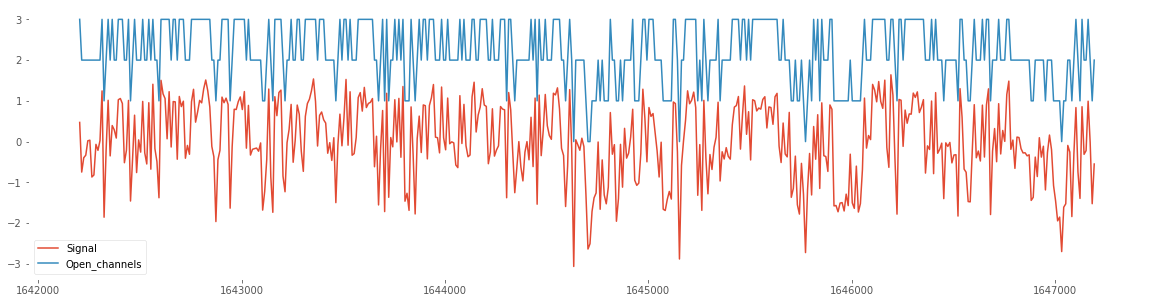

#########################
### Random 2039553 to 2044553
#########################


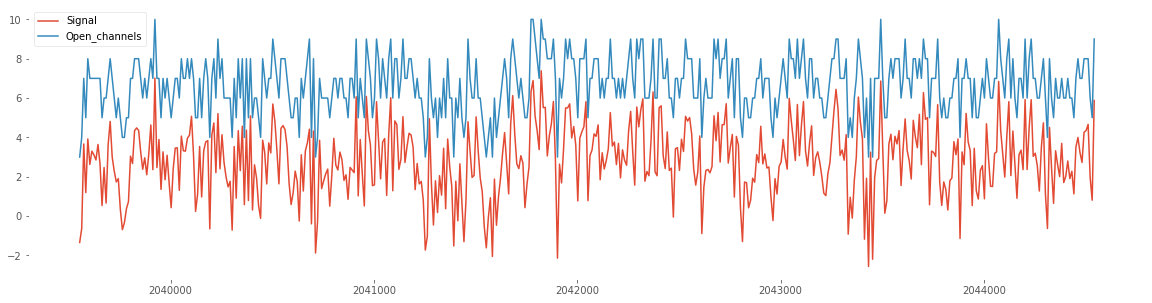

#########################
### Random 1210385 to 1215385
#########################


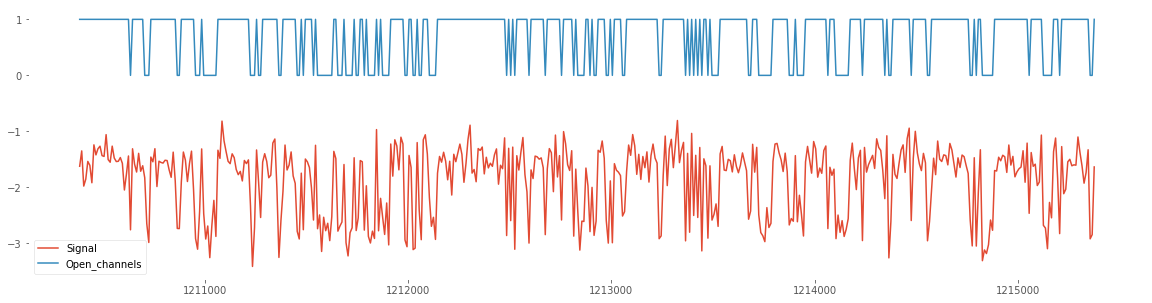

#########################
### Random 457547 to 462547
#########################


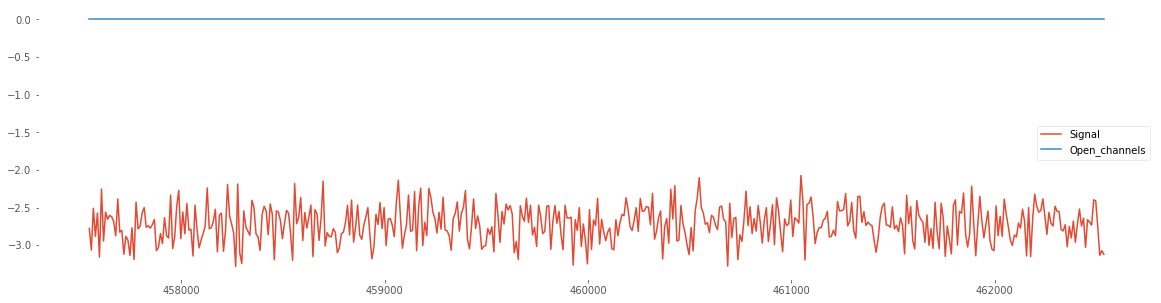

#########################
### Random 4297182 to 4302182
#########################


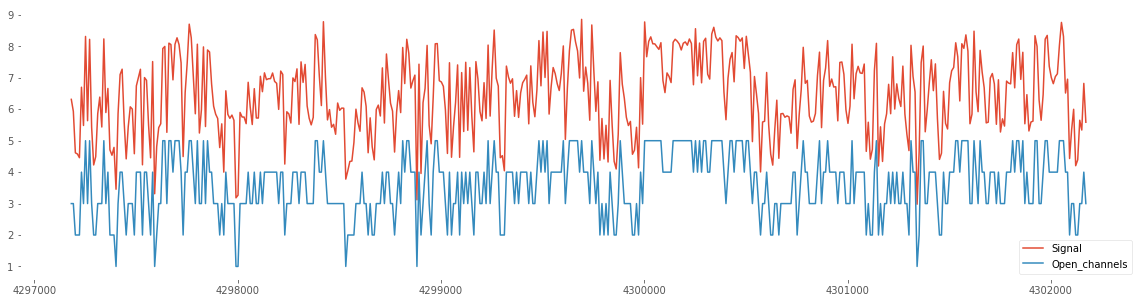

#########################
### Random 762149 to 767149
#########################


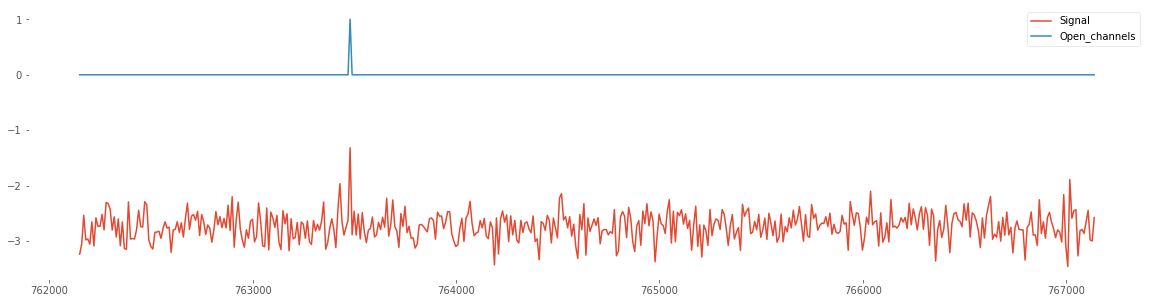

#########################
### Random 4200244 to 4205244
#########################


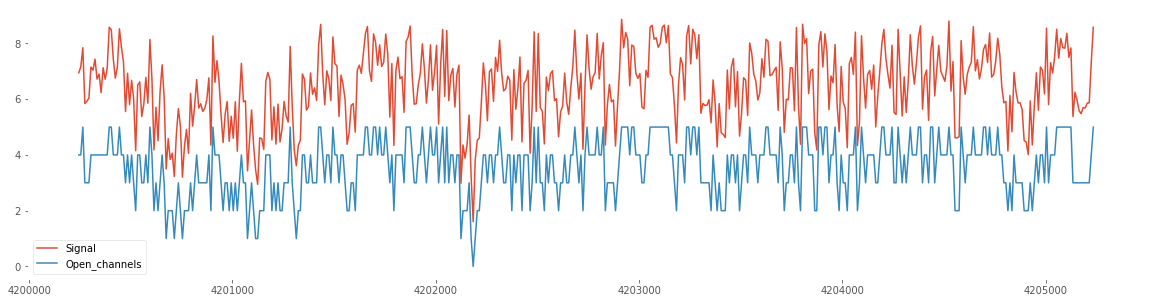

#########################
### Random 788836 to 793836
#########################


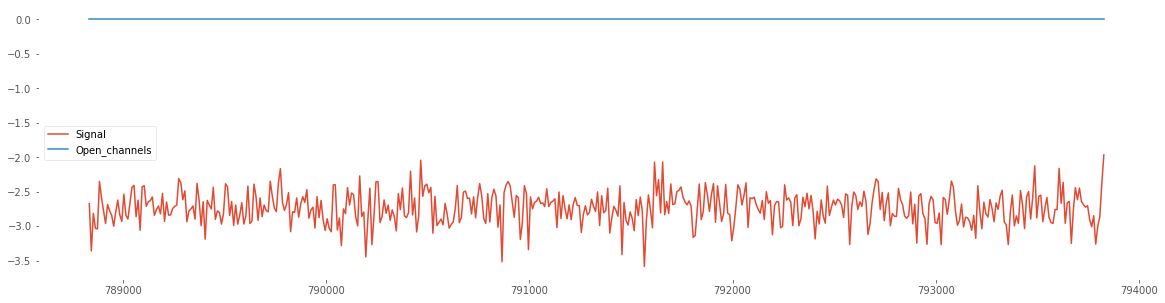

#########################
### Random 1506826 to 1511826
#########################


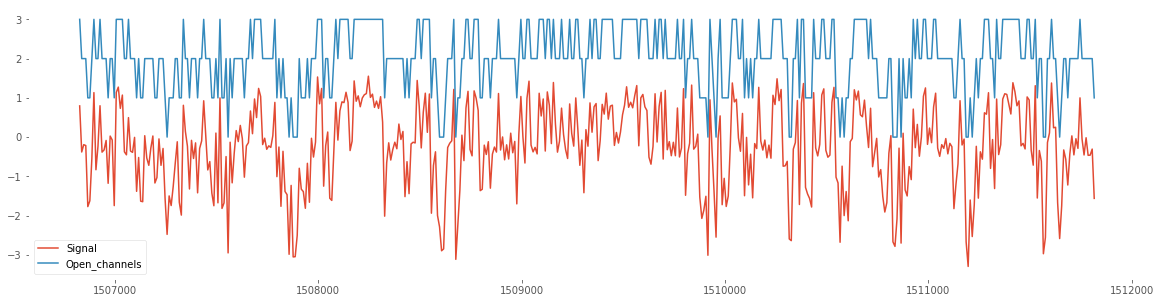

In [51]:
#pick up 5000 data and check correlation
for k in range(10):
    a = int( np.random.uniform(0,train.shape[0]-50000) )
    b=a+5000; res=10
    print('#'*25)
    print('### Random %i to %i'%(a,b))
    print('#'*25)
    plt.figure(figsize=(20,5))
    plt.plot(range(a,b,res),train.signal[a:b][0::res],label="Signal")
    plt.plot(range(a,b,res),train.open_channels[a:b][0::res],label="Open_channels")
    plt.legend()
    plt.show()

# Test_data

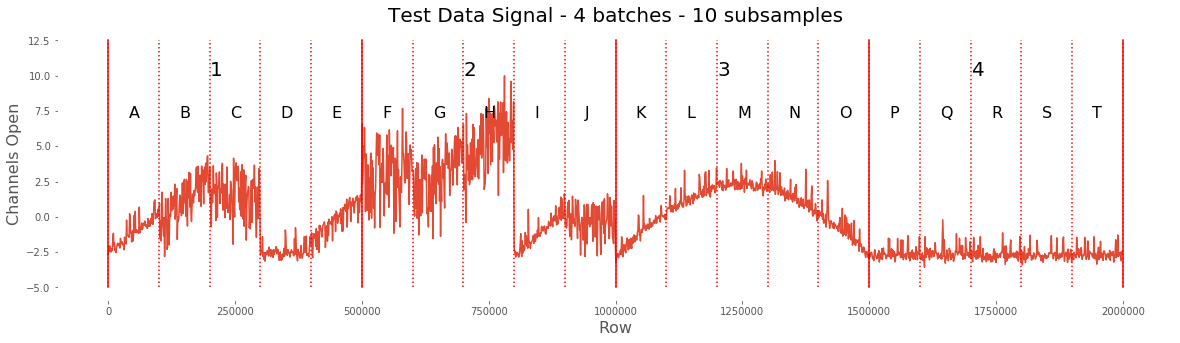

In [55]:
plt.figure(figsize=(20,5))
res = 1000; let = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T']
plt.plot(range(0,test.shape[0],res),test.signal[0::res])
for i in range(5): plt.plot([i*500000,i*500000],[-5,12.5],'r')
#devide 20 parts
for j in range(21): plt.plot([j*100000,j*100000],[-5,12.5],'r:')
for k in range(4): plt.text(k*500000+200000,10,str(k+1),size=20)
for k in range(20): plt.text(k*100000+40000,7,let[k],size=16)
plt.xlabel('Row',size=16); plt.ylabel('Channels Open',size=16); 
plt.title('Test Data Signal - 4 batches - 10 subsamples',size=20)
plt.show()

That's all!  